In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
titanic_data= pd.read_csv('/Users/taghridyassergomaa/Downloads/titanic/train.csv')

In [3]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


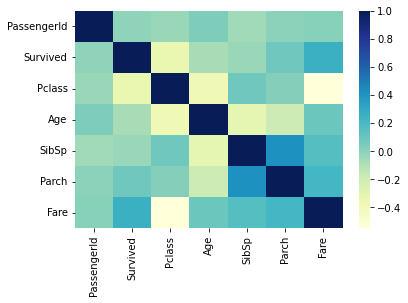

In [4]:
#to understand if there is a corolation
import seaborn as sns
sns.heatmap(titanic_data.corr(), cmap="YlGnBu")
plt.show()

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit (n_splits=1, test_size=0.2)
for train_indicies, test_indicies in split.split(titanic_data, titanic_data[['Survived','Pclass','Sex']]):
    strat_train_set= titanic_data.loc[train_indicies]
    strat_test_set= titanic_data.loc[test_indicies]

In [6]:
strat_test_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
332,333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S
752,753,0,3,"Vande Velde, Mr. Johannes Joseph",male,33.0,0,0,345780,9.5000,NaN,S
122,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S
...,...,...,...,...,...,...,...,...,...,...,...,...
416,417,1,2,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",female,34.0,1,1,28220,32.5000,NaN,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,NaN,S
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S
656,657,0,3,"Radeff, Mr. Alexander",male,NaN,0,0,349223,7.8958,NaN,S


<AxesSubplot:>

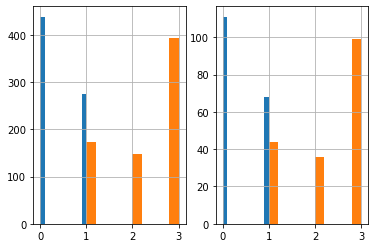

In [7]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

In [8]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 332 to 563
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Survived     179 non-null    int64  
 2   Pclass       179 non-null    int64  
 3   Name         179 non-null    object 
 4   Sex          179 non-null    object 
 5   Age          150 non-null    float64
 6   SibSp        179 non-null    int64  
 7   Parch        179 non-null    int64  
 8   Ticket       179 non-null    object 
 9   Fare         179 non-null    float64
 10  Cabin        46 non-null     object 
 11  Embarked     177 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.2+ KB


In [9]:
#imputation for missing value in age column 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self
    def transform(self, x):
        imputer=SimpleImputer(strategy='mean')
        x['Age'] = imputer.fit_transform(x[['Age']])
        return x
    

In [10]:
#onehot encoding for text
from sklearn.preprocessing import OneHotEncoder
class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, x, y=None):
        return self
    def transform(self, x):
        encoder= OneHotEncoder()
        matrix= encoder.fit_transform(x[['Embarked']]).toarray()
        column_names=["C","S","Q","N"]
        for i in range (len(matrix.T)):
            x[column_names[i]]= matrix.T[i]
        matrix= encoder.fit_transform(x[['Sex']]).toarray()
        column_names=["Female","Male"]
        for i in range (len(matrix.T)):
            x[column_names[i]]= matrix.T[i]
        return x 
    

In [11]:
#feature dropper
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self
    def transform (self,x):
        return x.drop(["Embarked","Sex","Ticket","Name","Cabin","N"], axis=1, errors='ignore')
        

In [12]:
from sklearn.pipeline import Pipeline
pipeline= Pipeline([("ageimputer",AgeImputer()),("featureencoder",FeatureEncoder()),("featuredropper",FeatureDropper())])


In [13]:
strat_train_set= pipeline.fit_transform(strat_train_set)


In [14]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
516,517,1,2,34.000000,0,0,10.5000,0.0,0.0,1.0,1.0,0.0
72,73,0,2,21.000000,0,0,73.5000,0.0,0.0,1.0,0.0,1.0
113,114,0,3,20.000000,1,0,9.8250,0.0,0.0,1.0,1.0,0.0
386,387,0,3,1.000000,5,2,46.9000,0.0,0.0,1.0,0.0,1.0
790,791,0,3,29.574911,0,0,7.7500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
303,304,1,2,29.574911,0,0,12.3500,0.0,1.0,0.0,1.0,0.0
517,518,0,3,29.574911,0,0,24.1500,0.0,1.0,0.0,0.0,1.0
64,65,0,1,29.574911,0,0,27.7208,1.0,0.0,0.0,0.0,1.0
76,77,0,3,29.574911,0,0,7.8958,0.0,0.0,1.0,0.0,1.0


In [15]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 516 to 236
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [16]:
from sklearn.preprocessing import StandardScaler
x =strat_train_set.drop(["Survived"], axis=1)
y =strat_train_set["Survived"]
scaler = StandardScaler()
x_data=scaler. fit_transform(x)
У_data= y.to_numpy()


In [17]:
x_data

array([[ 0.27207792, -0.37019624,  0.34342703, ...,  0.625     ,
         1.35941164, -1.35941164],
       [-1.44269808, -0.37019624, -0.66549092, ...,  0.625     ,
        -0.73561236,  0.73561236],
       [-1.28435164,  0.82789342, -0.74309999, ...,  0.625     ,
         1.35941164, -1.35941164],
       ...,
       [-1.47359494, -1.56828591,  0.        , ..., -1.6       ,
        -0.73561236,  0.73561236],
       [-1.42724964,  0.82789342,  0.        , ...,  0.625     ,
        -0.73561236,  0.73561236],
       [-0.80931235, -0.37019624,  1.11951776, ...,  0.625     ,
        -0.73561236,  0.73561236]])

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf= RandomForestClassifier()
param_grid=[{"n_estimators":[10,100,200,500],'max_depth':[None,5,10],"min_samples_split":[2,3,4]}
    
]
grid_search=GridSearchCV(clf,param_grid,cv=3,scoring="accuracy",return_train_score= True)
grid_search.fit(x_data,У_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [22]:
final_clf=grid_search.best_estimator_

In [23]:
final_clf

RandomForestClassifier(max_depth=10, n_estimators=200)

In [24]:
strat_test_set=pipeline.fit_transform(strat_test_set)

In [25]:
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
332,333,0,1,38.000000,0,1,153.4625,0.0,0.0,1.0,0.0,1.0
752,753,0,3,33.000000,0,0,9.5000,0.0,0.0,1.0,0.0,1.0
122,123,0,2,32.500000,1,0,30.0708,1.0,0.0,0.0,0.0,1.0
829,830,1,1,62.000000,0,0,80.0000,0.0,0.0,0.0,1.0,0.0
449,450,1,1,52.000000,0,0,30.5000,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
416,417,1,2,34.000000,1,1,32.5000,0.0,0.0,1.0,1.0,0.0
147,148,0,3,9.000000,2,2,34.3750,0.0,0.0,1.0,1.0,0.0
751,752,1,3,6.000000,0,1,12.4750,0.0,0.0,1.0,0.0,1.0
656,657,0,3,30.166133,0,0,7.8958,0.0,0.0,1.0,0.0,1.0


In [30]:
x_test =strat_test_set.drop(['Survived'],axis=1)
У_test = strat_test_set['Survived']
scaler = StandardScaler()
x_data_test =scaler.fit_transform(x_test)
y_data_test = У_test.to_numpy()

In [31]:
final_clf.score(x_data_test,y_data_test)

0.8603351955307262

In [32]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [33]:
final_data = pipeline.fit_transform(titanic_data)


In [35]:
x_final =final_data.drop(['Survived'],axis=1)
y_final = final_data['Survived' ]
scaler= StandardScaler()
x_data_final= scaler. fit_transform(x_final)
y_data_final = y_final.to_numpy ()

In [38]:
prod_clf= RandomForestClassifier()
param_grid=[{"n_estimators":[10,100,200,500],'max_depth':[None,5,10],"min_samples_split":[2,3,4]}
    
]
grid_search=GridSearchCV(prod_clf,param_grid,cv=3,scoring="accuracy",return_train_score= True)
grid_search.fit(x_data_final,y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [39]:
prod_final_clf=grid_search.best_estimator_

In [40]:
#prod_final_clf

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=200)

In [41]:
titanic_test_data=pd.read_csv('/Users/taghridyassergomaa/Downloads/titanic/test.csv')

In [42]:
titanic_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [43]:
final_test_data = pipeline.fit_transform(titanic_test_data)


In [44]:
final_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [45]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


In [49]:
x_final_test=final_test_data
x_final_test=x_final_test.fillna(method='ffill')
scalar=StandardScaler()
x_data_final_test=scaler. fit_transform(x_final_test)

In [50]:
predictions=prod_final_clf.predict(x_data_final_test)

In [51]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [55]:
#creat a data fram for prediction
final_df=pd.DataFrame(titanic_test_data["PassengerId"])
final_df["Survived"]=predictions
final_df.to_csv("/Users/taghridyassergomaa/Downloads/titanic/predictions.scv", index=False)

In [56]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
